In [1]:
import os, sys
sys.path.append("..")

In [2]:
from opttrot.pauli import from_pstr
from opttrot.pauli_frame import PauliFrame
from opttrot.hamiltonian import Hamiltonian
from opttrot.utils import _bitwise_count_c

from opttrot.graph_algs.graph_opts import DWave

In [3]:
import numpy as np
np.version.version
from matplotlib import pyplot as plt

# Test with IZ family Hamiltonian

In [12]:
# Random IZ Hamiltonian
qubits = 4
N = int(2**qubits)
H = np.diag(np.random.rand(N)).astype(complex)
H[1,2] = 0.4
H[2,1] = 0.4

In [13]:
hamiltonian = Hamiltonian(H)

In [14]:
a = hamiltonian.poly

In [17]:
mat = hamiltonian.adj_mat

In [18]:
from dwave.cloud import Client
from dwave.system.samplers import DWaveCliqueSampler
import dwave_networkx as dnx

import rustworkx as rx
import networkx as nx

In [19]:

client = Client(token= token)


In [25]:
sampler_cli = DWaveCliqueSampler(token= token)

In [10]:
dwave_solver = DWave(token = token)

In [21]:
hamiltonian.get_commuting_group(solver = None)

defaultdict(list,
            {0: ['IIXY',
              'IIYX',
              'IIII',
              'IIZZ',
              'IZII',
              'IZZZ',
              'ZIII',
              'ZIZZ',
              'ZZII',
              'ZZZZ'],
             1: ['IIIZ',
              'IIZI',
              'IZIZ',
              'IZZI',
              'ZIIZ',
              'ZIZI',
              'ZZIZ',
              'ZZZI']})

In [22]:
adj = rx.adjacency_matrix(hamiltonian.to_graph())
G = nx.from_numpy_array(adj)

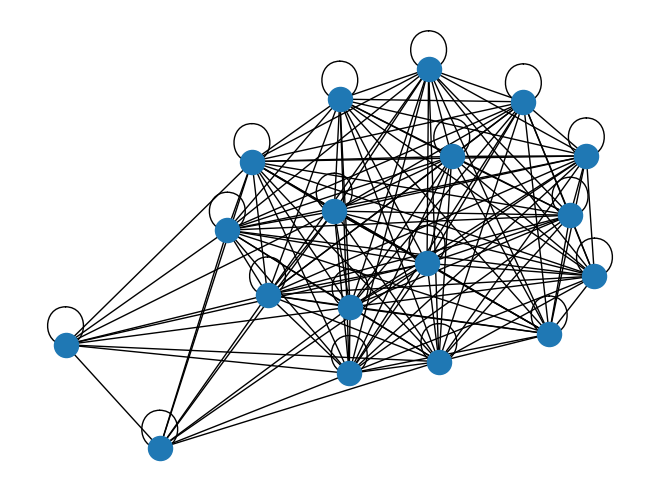

In [23]:
nx.draw(G)

In [34]:
sampler_cli = DWaveCliqueSampler(token= token)
clique = dnx.maximum_clique(G, sampler = sampler_cli)

In [11]:
hamiltonian.get_commuting_group(solver = dwave_solver)

Get a client:


: 

: 

In [9]:
commuting_group=hamiltonian.get_commuting_group()

In [10]:
commuting_group[0]

['IIII',
 'IIIZ',
 'IIZI',
 'IIZZ',
 'IZII',
 'IZIZ',
 'IZZI',
 'IZZZ',
 'ZIII',
 'ZIIZ',
 'ZIZI',
 'ZIZZ',
 'ZZII',
 'ZZIZ',
 'ZZZI',
 'ZZZZ']

In [11]:
pf = PauliFrame(qubits)
pf

1, IIIZ, IIIX
1, IIZI, IIXI
1, IZII, IXII
1, ZIII, XIII

In [22]:
Distance = {
    0: [],
    1: [],
    2: [],
    3: []
}
pf = PauliFrame(qubits)
for p in commuting_group[0]:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    Distance[L].append(p)

print(Distance)


{0: ['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'], 1: ['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'], 2: ['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI'], 3: ['ZZZZ']}


In [15]:
pf.relative_supp(from_pstr("ZZIZ", 1.0).sym_code, count="front")

0

In [16]:
pf.relative_supp(from_pstr("ZZIZ", 1.0).sym_code, count="front")

0

Modified Ultra Greedy Search

```
Algorithm 1 PFG Ultra-greedy Search 

Input: List of Hamiltonian terms and angles H = {(θα, pα)} 
Return: List of circuit elements Creturn 
1: Creturn ← {} i.e. is an empty circuit. 
2: ham ← {bin(pα)}. 
3: while ham ̸= ∅ do 
4:      minsup ← N 
5:      hammin = {} 
6:      cost = 1.1 
7:      gmin ← I 
8:      for p ∈ ham do 
9:         if Supp(p) =1 then 
10:            Add rotation to Creturn according to local support for 
               angle ±θα with sign given by sign of p. 
11:            Remove p from ham. 
12:        else if Supp(p) = minsup then 
13:            Add p to hammin 
14:        else if 2 ≤ Supp(p) < minsup then 
15:            Clear hammin and add p 
16:            minsup ← Supp(p) 
17:        end if 
18:     end for 
19:     for p ∈ hammin do 
20:         for all gates g which reduces support of p do 
21:             if costc(g) < cost then 
22:                 gmin ← g. 
23:                 cost ← costc(g) 
24:             end if 
25:         end for 
26:     end for 
27:     Add gmin to Creturn. 
28:     Update all members of ham using the TQE transformation rules for gmin. 
29: end while
```